In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
data = pd.read_csv('/content/amazon_reviews.csv')

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess_text(text):
    if isinstance(text, float):
        text = str(text)
    text = text.lower()
    text = re.sub(r'[\[\]\(\)\.,;:?!\"\'—–“”‘’]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words]
    return " ".join(tokens)
data['data'] = data['reviewText'].apply(preprocess_text)

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['target'] = data['data'].apply(get_sentiment)

In [ ]:
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,data,target
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,issu,neutral
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,purchas devic work advertis never much phone m...,negative
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,work expect sprung higher capac think made bit...,positive
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,think work greathad diff bran 64gb card went s...,neutral
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,bought retail packag arriv legit orang envelop...,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0,bought sandisk 16gb class 10 use htc inspir 3 ...,positive
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,use extend capabl samsung galaxi note 10 great...,neutral
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0,great card fast reliabl come option adapt sd s...,positive
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,good amount space stuff want fit gopro say,positive


In [ ]:
data['target'] = data['target'].apply(lambda x: 1 if x == "positive" else 0)

In [ ]:
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,data,target
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,issu,0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,purchas devic work advertis never much phone m...,0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,work expect sprung higher capac think made bit...,1
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,think work greathad diff bran 64gb card went s...,0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,bought retail packag arriv legit orang envelop...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0,bought sandisk 16gb class 10 use htc inspir 3 ...,1
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,use extend capabl samsung galaxi note 10 great...,0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0,great card fast reliabl come option adapt sd s...,1
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,good amount space stuff want fit gopro say,1


In [ ]:
data['target'].value_counts()

,count
target,
1,3667
0,1248


In [ ]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Remove stopwords and stem words
    text = ' '.join(text)
    return text

In [ ]:
data['text'] = data['data'].apply(preprocess_text)

In [ ]:
X = data['text']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
joblib.dump(vectorizer, 'tfidf_vectorizer_ourdata.pkl')

['tfidf_vectorizer_ourdata.pkl']

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)
joblib.dump(nb_model, 'naive_bayes_model1.pkl')

['naive_bayes_model1.pkl']

In [ ]:
svm_model = SVC()
svm_model.fit(X_train_vect, y_train)
joblib.dump(svm_model, 'svm_model1.pkl')

['svm_model1.pkl']

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)
joblib.dump(lr_model, 'logistic_regression_model1.pkl')

['logistic_regression_model1.pkl']

In [ ]:
y_pred_nb = nb_model.predict(X_test_vect)
y_pred_svm = svm_model.predict(X_test_vect)
y_pred_lr = lr_model.predict(X_test_vect)

In [ ]:
print("Naive Bayes Model")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Naive Bayes Model
Accuracy: 0.7507629704984741
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       245
           1       0.75      1.00      0.86       738

    accuracy                           0.75       983
   macro avg       0.38      0.50      0.43       983
weighted avg       0.56      0.75      0.64       983

SVM Model
Accuracy: 0.8402848423194303
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.39      0.55       245
           1       0.83      0.99      0.90       738

    accuracy                           0.84       983
   macro avg       0.88      0.69      0.73       983
weighted avg       0.85      0.84      0.81       983

Logistic Regression Model
Accuracy: 0.8351983723296033
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.38      0.53       245
           1       0.83 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


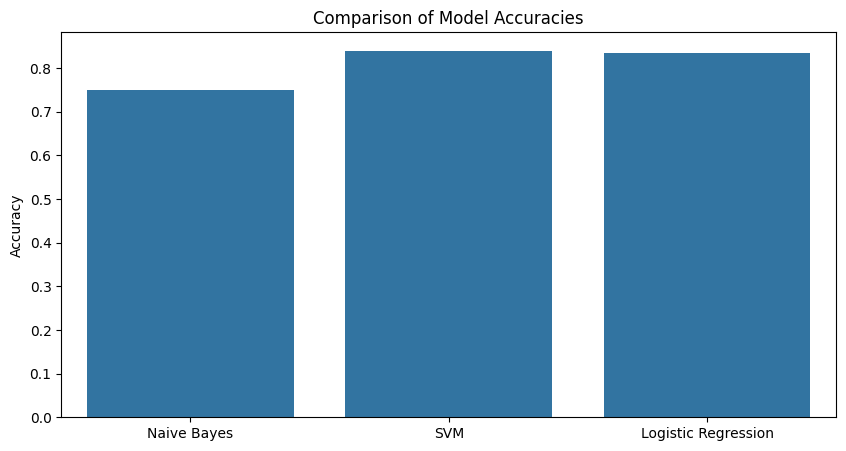

In [ ]:
models = ['Naive Bayes', 'SVM', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_lr)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()